Loading in packages and pre set to use on the toy data set

In [1]:
import h5py
import numpy as np

hf = h5py.File('C:/Users/omare/OneDrive/Documents/HDA/CVD_project/ECG_toy_data/toy_dataset.h5', 'r')
hf.keys()
ecgs = np.array(hf.get('ECGs'))
labels = np.array(hf.get('labels'))



In [2]:
ecgs.shape

(1000, 4096, 12)

Visualising the 12 channels of the first ecg

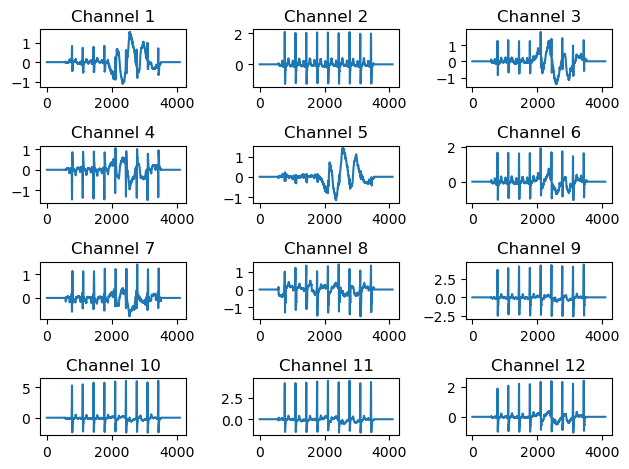

In [3]:
import matplotlib.pyplot as plt

# Assuming 'ecgs' is the variable containing the ECG data
first_ecg = ecgs[0]  # Get the first ECG

# Plotting the 12 channels of the first ECG
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.plot(first_ecg[:, i])
    plt.title('Channel {}'.format(i+1))

plt.tight_layout()
plt.show()


Visualing the leads the way David did it because he probably understands ECG a bit better than me

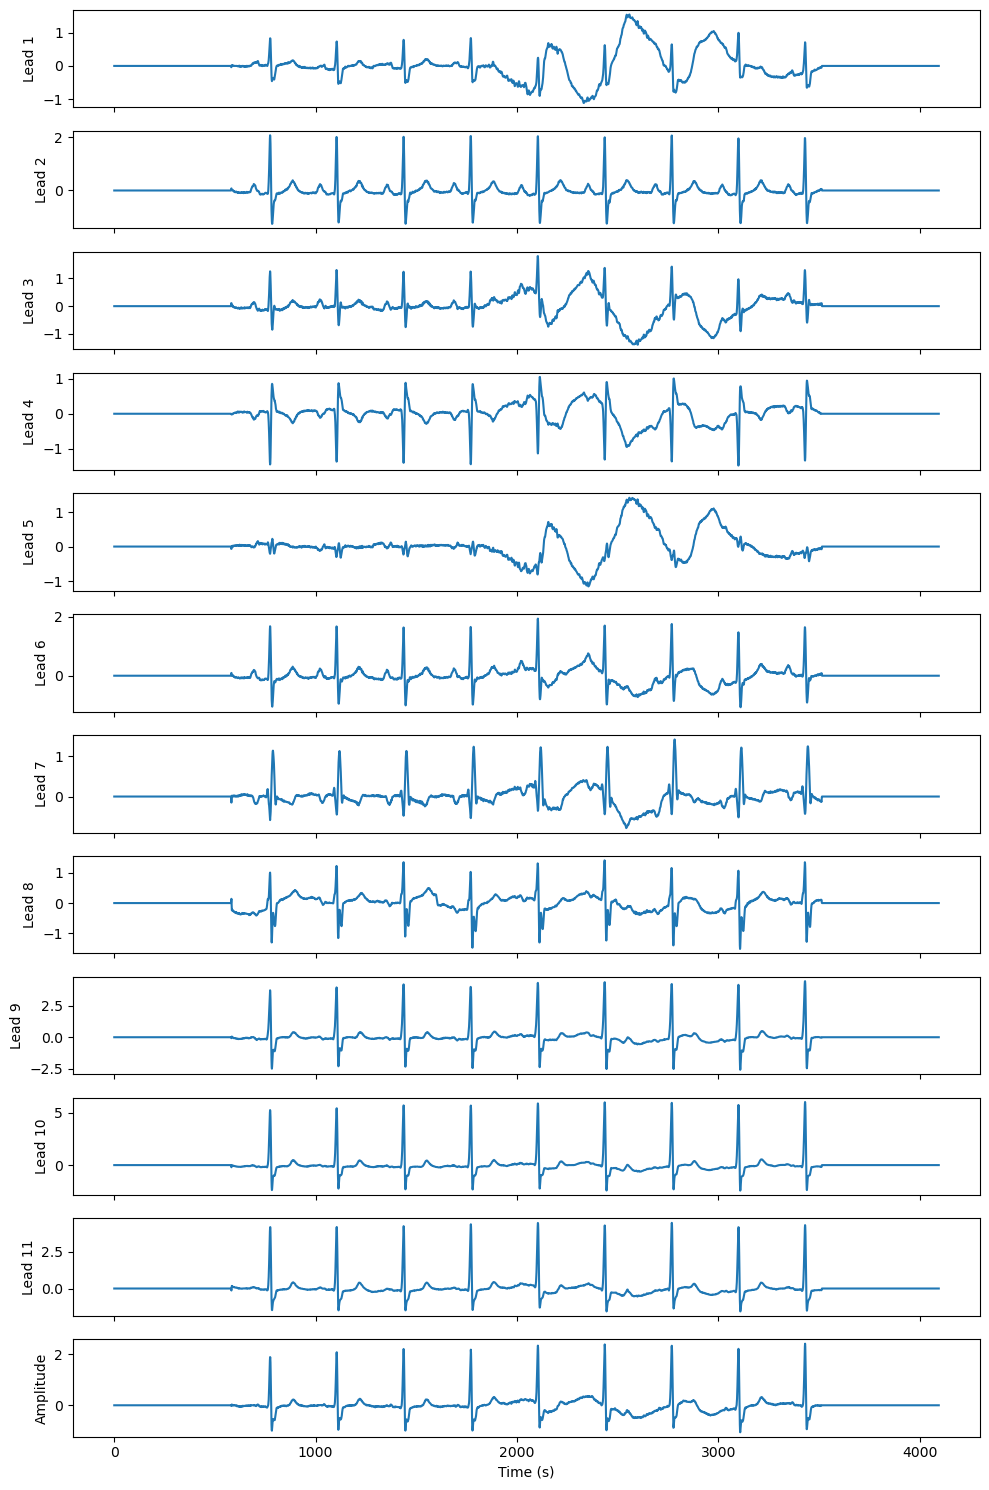

In [4]:
first_ecg = ecgs[0]
fig, axs = plt.subplots(nrows=12, sharex=True, figsize=(10, 15))
for i in range(12):
    axs[i].plot(first_ecg[:, i])
    axs[i].set_ylabel(f'Lead {i+1}')
axs[-1].set_xlabel('Time (s)')
axs[-1].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Removing QRS

In [10]:
#taking in one ecg lead
ecg_lead = ecgs[1, :, 1]
print(ecg_lead)

[0. 0. 0. ... 0. 0. 0.]


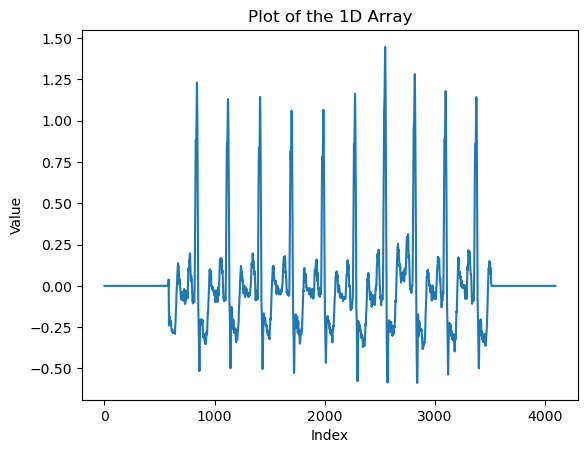

In [11]:
# Plotting the array
plt.plot(ecg_lead)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of the 1D Array')
plt.show()

In [12]:
ecg_lead.shape

(4096,)

In [13]:
ecg_lead_reshape = ecg_lead.reshape(4096,1)

In [21]:
from QRS_Subtract_docstring import Adaptive_singular_qrs


#index of each qrs peak
peak_index = np.array([300, 800,1200,1600])
#removing all zeros from ecg reading so that to inf divisions will happen
non_zero_mask = ecg_lead_reshape.flatten() != 0
ecg_lead_non_zero = ecg_lead_reshape[non_zero_mask].reshape(-1, 1)

# Calling the function with the updated variables
ecg_lead_adjusted = Adaptive_singular_qrs(peak_index, ecg_lead_non_zero, 1000, False)


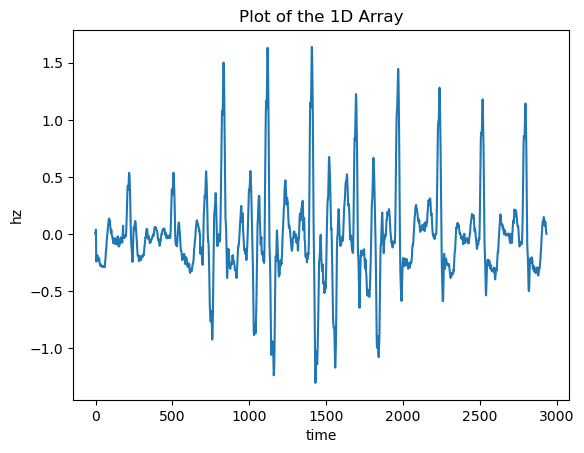

In [22]:
plt.plot(ecg_lead_adjusted)
plt.xlabel('time')
plt.ylabel('hz')
plt.title('Plot of the 1D Array')
plt.show()